# Description Analytics 

In [1]:
# Visual Analysis
# Finding points of Wine via Textual Description only

In [2]:
import numpy as np                                                        # Handling Arrays and dimensions
import pandas as pd                                                       # Data Handling and Manipulation
import seaborn as sns                                                     # Plotting of Graphs
import matplotlib.pyplot as plt                                           # Plotting of Graphs
from sklearn.preprocessing import LabelBinarizer                          # Binarization of classifiers
from sklearn.linear_model import LinearRegression                         # For Linear Relationship(if any)
from sklearn.metrics import classification_report                         # As name suggests
from sklearn.model_selection import cross_val_score                       # Checking validation score
from sklearn.feature_extraction.text import TfidfVectorizer               # Balancing word frequency
from sklearn.linear_model.logistic import LogisticRegression              # For Descriptive Analytics

In [3]:
A = pd.read_csv("winemag-data-130k-v2.csv")
B = pd.read_csv("winemag-data_first150k.csv")
A.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


           points        price
points   9.239960    51.976092
price   51.976092  1682.822342


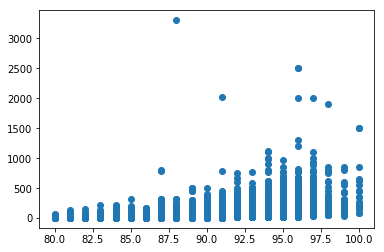

In [4]:
l=['points','price']
db=pd.DataFrame(A[l])
print(db.cov())
plt.scatter(A.points, A.price)

In [5]:
db.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


# Visualizing Various Parameters

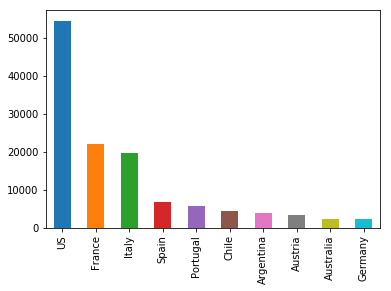

In [6]:
A['country'].value_counts().head(10).plot.bar()

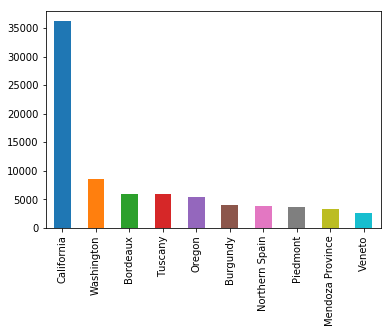

In [7]:
A['province'].value_counts().head(10).plot.bar()

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


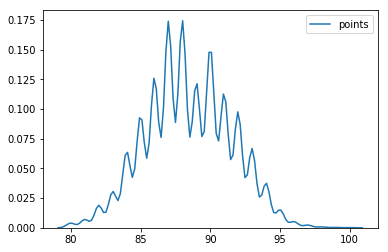

In [8]:
sns.kdeplot(A.points)

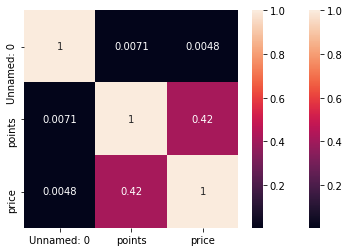

In [9]:
heat = A.corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True)
plt.show()

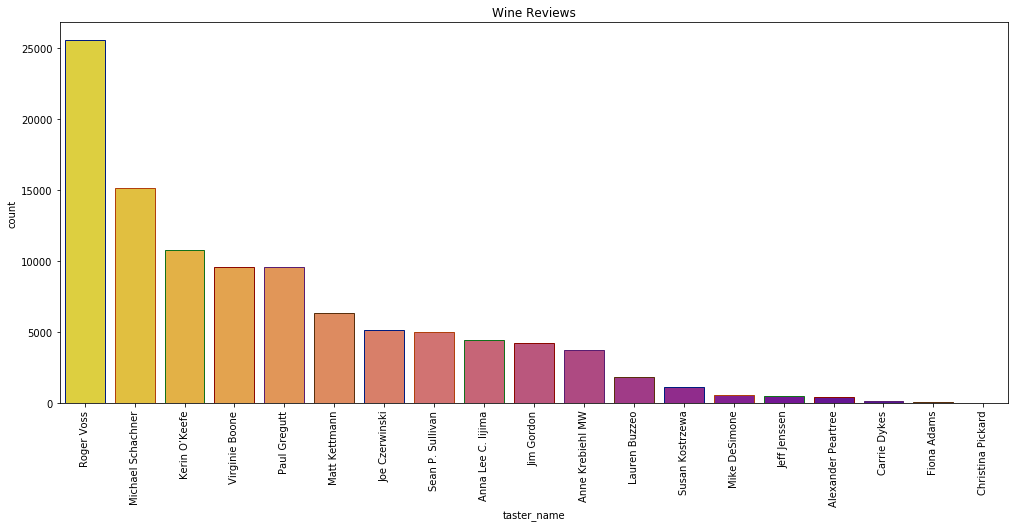

In [10]:
plt.subplots(figsize=(17,7))
sns.countplot('taster_name',data=A,palette= 'plasma_r',edgecolor=sns.color_palette('dark',6),order=A['taster_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Wine Reviews')
plt.show()

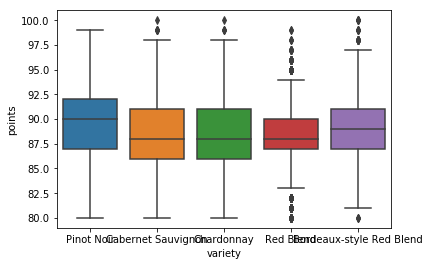

In [11]:
df = A[A.variety.isin(A.variety.value_counts().head().index)]

sns.boxplot(x='variety',y='points',data=df)
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


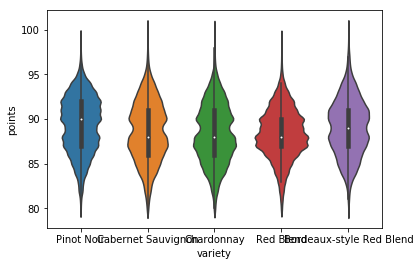

In [12]:
sns.violinplot(x='variety',y='points',data=A[A.variety.isin(A.variety.value_counts()[:5].index)])
plt.show()

# Analytics

In [13]:
# Removing NAN Datasets
A = A.drop_duplicates('description')
A = A[pd.notnull(A.price)]
A = A[pd.notnull(A.points)]
B = B.drop_duplicates('description')
B = B[pd.notnull(B.price)]
B = B[pd.notnull(B.points)]

# Relation among Price and Points

Pearson Correlation: (0.4165661551799589, 0.0)
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 8.455e+04
Date:                Thu, 28 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:19:06   Log-Likelihood:            -5.7424e+05
No. Observations:              111567   AIC:                         1.148e+06
Df Residuals:                  111566   BIC:                         1.148e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
point

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


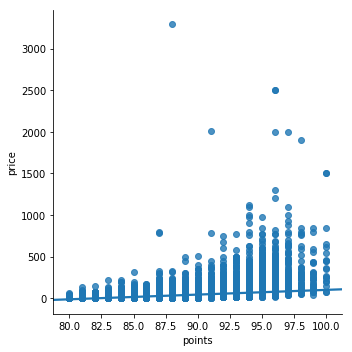

In [14]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(A.price, A.points))
print(sm.OLS(A.price, A.points).fit().summary())
sns.lmplot(y = 'price', x='points', data=A)

In [15]:
# Here we can see Log-Likehood and P value depicting better relationship but corr is low

In [16]:
X_train=np.asarray(A.price).reshape(-1,1)
y_train=np.asarray(A.points).reshape(-1,1)
X_test=np.asarray(B.price).reshape(-1,1)
y_test=np.asarray(B.points).reshape(-1,1)
lr=LinearRegression()
lr.fit(X_train, y_train)
prediction=lr.predict(X_test)
pres=prediction.astype(int)

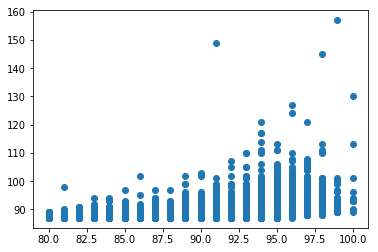

In [17]:
plt.scatter(y_test, pres)

In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test, pres)*100,"%")

Accuracy Score: 14.106477532881447 %


In [19]:
# It is cearly shown that accuracy is too for Linear Relationship

# Anaytics based on Description

In [20]:
X_train_desc=A.description
y_train_desc=A.points
# Directly applying TfIdf for description
vectorizer = TfidfVectorizer(stop_words='english')
X_train=vectorizer.fit_transform(X_train_desc)
LR=LogisticRegression()
LR.fit(X_train, y_train_desc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
X_test_desc=B.description
y_test_desc=B.points
X_test=vectorizer.transform(X_test_desc)

# Classification Report

In [22]:
desc_prediction=LR.predict(X_test)
print(desc_prediction)
print(classification_report(y_test_desc, desc_prediction))

[93 92 92 ... 90 86 86]
             precision    recall  f1-score   support

         80       0.83      0.06      0.12       548
         81       0.48      0.03      0.05       930
         82       0.45      0.20      0.27      2421
         83       0.37      0.15      0.21      3601
         84       0.36      0.28      0.31      6491
         85       0.30      0.27      0.28      7473
         86       0.30      0.29      0.30      9145
         87       0.28      0.47      0.35     11733
         88       0.27      0.36      0.31     10468
         89       0.28      0.16      0.20      7658
         90       0.30      0.40      0.34      9662
         91       0.30      0.29      0.29      6360
         92       0.30      0.33      0.31      5436
         93       0.34      0.21      0.26      3506
         94       0.37      0.14      0.21      2045
         95       0.72      0.03      0.06       979
         96       0.00      0.00      0.00       362
         97       0.0

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test_desc, desc_prediction)*100,"%")

Accuracy Score: 29.885083269740093 %


In [24]:
# Now there is low accuracy, mainly because other factors has to be taken under consideration.

In [25]:
# If required to prove further, We will continue our Exploratory Analytics to obtain better accuracy :)
# As all the headers {Variety, Region etc} must all be taken under consideration for this dataset